# Analysis of Chicago Public Schools Performance

### Shu-Yen Chang

### December 5, 2024

## Introduction
This project aims to provide parents with a comparative analysis of Chicago public schools. By examining key metrics such as student attendance rate and education quality survey result, parents can better evaluate school performance across different neighborhoods in Chicago.
I chose this topic because I am preparing to become a parent and have developed a keen interest in the student experience within the American public school system. Living in the Midwest and studying at Northwestern University, I see Chicago as an ideal case study for exploring these dynamics.
One of the primary goals is to correlate student attendance rate with survey response rate and survey results to make inferences about possible relationships between the data points. Furthermore, there is an opportunity to visualize the data on a map of Chicago by zip code. An enlarged map of the Loop neighborhood may also be necessary to capture inner city zip codes as well. Another primary goal is to understand improvements and declines in student experience overtime as measured by the survey and their potential impact on student attendance in different "Sides" of the city.

### Hypotheses
##### By School Type
Assumption: Schools categorized as Charter, Magnet, Classical, and Regional Gifted Centers will tend to have higher scores across various metrics. The total number of schools in this category may decrease over time, as they are more exclusive.  
Reasoning: These schools typically see greater family and teacher involvement, fostering better academic and social outcomes. Declining birth rates, family size, and out-of-state transplants in Chicago could reduce the demand and sustainability of these schools.
##### By Region
Assumption: Schools in more developed areas such as the North Side, Loop, and South Loop will show higher overall scores compared to schools in less developed regions like the West Side and South Side.
Reasoning: Developed areas typically have better infrastructure, community resources, and a stronger emphasis on education, leading to improved performance metrics.
##### By Scoring Criteria
Assumption: Schools scoring high in certain criteria will also score high in related criteria or vice versa.
Reasoning: Different scoring criteria are related such as involved families and supportive environment, or ambitious instruction and effective leaders. It's reasonable to assume performance in criteria with similar influential factors will correlate.
##### By Attendance Rate
Assumption: Schools with higher attendance rate should perform better in other measures of performance.
Reasoning: Schools with supportive environments, that are safe, as well as excel in other criteria provide incentive for students to attend class. Though attendance rate may be considered a lagging indicator of performance, its reasonable to assume without drastic changes to public school performance year to year, attendance rate and survey score results should correlate.

## Data Explained
Data was sourced from [DATA.GOV](https://data.gov/). See links below.
- [school_year 2015.2016](https://catalog.data.gov/dataset/chicago-public-schools-school-progress-reports-sy1516)
- [school_year 2016.2017](https://catalog.data.gov/dataset/chicago-public-schools-school-progress-reports-sy1617)
- [school_year 2017.2018](https://catalog.data.gov/dataset/chicago-public-schools-school-progress-reports-sy1718)
- [school_year 2018.2019](https://catalog.data.gov/dataset/chicago-public-schools-school-progress-reports-sy1819)
- [school_year 2023.2024](https://catalog.data.gov/dataset/chicago-public-schools-school-progress-reports-sy2324)

#### Population
1.City of Chicago public elementary and high school survey participants from 2015 to 2018, plus 2022  

2.660 Public Schools

To maximize the dataset's coverage, I initially planned to collect data from 2015 through 2022. However, I had to exclude a few years due to missing data in 2019 and 2020, as well as insufficient data collection in 2021 likely due to the pandemic. Therefore, my analysis focuses on data from 2015 to 2018 and 2022.

To prepare the dataset, I inspected columns and assessed the number of non-null values, eliminated irrelevant columns, handled missing data by dropping null values, renamed columns to improve readability, converted descriptive data into numeric format, and merged datasets from all years within scope.

The regional distribution of ZIP codes in the analysis is based on two maps, shown below.      





<div style="display: flex; justify-content: space-between;">
    <img src="chicago neighborhood.jpg" width="400" height="300"/>
    <img src="chicago neighborhood2.jpg" width="400" height="300"/>
</div>

| Column | Description | Type |
| --- | --- | --- |
| School_ID | Every school has one specific ID number. | Int64 |
| School_Type | 13 types of public school | Object |
| Elementary/High | ES represents elementary school, HS represents high school | Object |
| Zip | Schools' zip code | Int32 |
| Report_Year | The year of progress report | Int64 |
| Student_Response_Rate | Student response rate | Float64 |
| Involved_Families | School survey about family engagement and parental involvement | Object |
| Supportive_Environment | School survey about how supportive the environment is for students | Object |
| Ambitious_Instruction | Evaluating the quality and rigor of instructional practices within a school | Object |
| Effective_Leaders | Evaluating the quality and impact of leadership within a school | Object |
| Collaborative_Teachers | Assessing the degree of collaboration among teachers | Int32 |
| Safety | Assessing the physical, emotional, and psychological safety of students | Object |
| Student_Attendance_Y1| The student attendance rate in the first portion of an academic year within a calendar year  | Float64 |
| Student_Attendance_Y2| The student attendance rate in the second portion of an academic year within a calendar year | Float64 |
| Involved_Families_Score | Converting the descriptive value to numeric valuse in "Involved_Families" category |float64  |
| Supportive_Environment_Score | Converting the descriptive value to numeric valuse in "Supportive_Environment" category |float64  |
| Ambitious_Instruction_Score | Converting the descriptive value to numeric valuse in "Ambitious_Instruction" category |float64  |
| Effective_Leaders_Score | Converting the descriptive value to numeric valuse in "Effective_Leaders" category |float64  |
| Collaborative_Teachers_Score | Converting the descriptive value to numeric valuse in "Collaborative_Teachers" category |float64  |
| Safety_Score | Converting the descriptive value to numeric valuse in "Safety" category |float64 |
| Overall_Score | The average of the six categories |float64  |
|Average_Attendance | The average rate of student attendance for both year one and year two |float64  |


## Results

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
# Read in final files
phase2 = pd.read_csv('filtered_data2.csv')

In [4]:
# Show file
phase2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   School_ID                     3148 non-null   int64  
 1   School_Type                   3148 non-null   object 
 2   Elementary/High               3148 non-null   object 
 3   Zip                           3148 non-null   int64  
 4   Report_Year                   3148 non-null   int64  
 5   Student_Response_Rate         3148 non-null   float64
 6   Involved_Families             3148 non-null   object 
 7   Supportive_Environment        3148 non-null   object 
 8   Ambitious_Instruction         3148 non-null   object 
 9   Effective_Leaders             3148 non-null   object 
 10  Collaborative_Teachers        3148 non-null   object 
 11  Safety                        3148 non-null   object 
 12  Student_Attendance_Y1         3148 non-null   float64
 13  Stu

#### Performance of Different School Type based on Average Survey Score
Yearly surveys assess student satisfaction across the following aspects: family involvement, supportive environment, ambitious instruction, effective leadership, collaborative teachers, and safety.   

The survey consists of five possible responses which have been converted from descriptive to numerical values. The value 'Very Strong' was converted to 5, 'Strong' to 4, 'Neutral' to 3, 'Weak' to 2, 'Very Weak' to 1, 'Not Enough Data' to 2.5. 2.5 was chosen instead of zero, for example, because it was a mid-range value that did not penalize the average for having 'Not Enough Data' entries.

Per expectations, Classical and Regional Gifted Center were the two highest perfoming elementary school types in the survey, however small schools came in a close third. For high schools however, though charter and magnet schools performed well, they were handily outdone by Special Education and Selective Enrollment. 

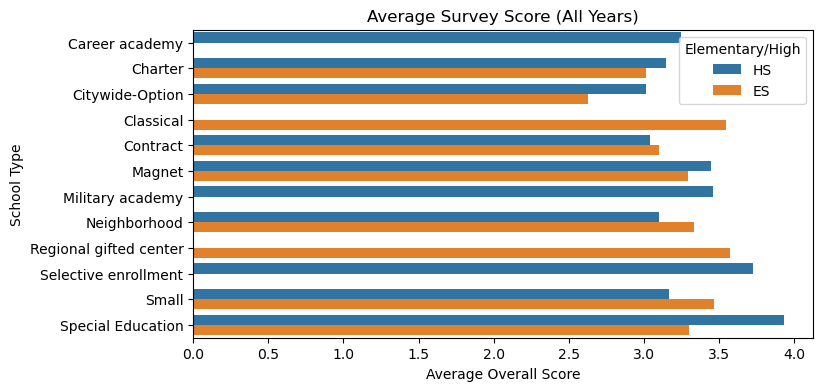

In [10]:
school_type_performance =phase2.groupby(['School_Type', 'Elementary/High'])['Overall_Score'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Overall_Score', y='School_Type', hue='Elementary/High', data=school_type_performance)
plt.title('Average Survey Score (All Years)')
plt.xlabel('Average Overall Score')
plt.ylabel('School Type')
plt.legend(title='Elementary/High')
plt.show();

#### The Longevity of Charter, Magnet, Classical, Regional Gifted Centers Over the Years
This analysis examines the longevity of Charter, Magnet, Classical, and Regional Gifted Centers based on the elementary schools category.
Reasons for choosing these four types of elementary school to analyze are:
Being an expectant mother, I'm keenly aware of which elementary schools might appeal to my son in the future. I feel that Classical, Charter, Magnet, and Regional Gifted Centers provide the best options based on my research, however I am curious about the longevity of these schools and if his options for programs to choose from will increase or decrease as time goes on.   

According to the graph, the number of elementary schools in these four categories have remained relatively stable over the scope of the data examined. 

In [4]:
# Filtered out four types of school from ES column
school_types_to_include = ['Charter', 'Magnet', 'Classical', 'Regional gifted center']
df_filtered = phase2[(phase2['Elementary/High'] == 'ES') & (phase2['School_Type'].isin(school_types_to_include))]

school_counts = df_filtered.groupby(['School_Type', 'Report_Year']).size().reset_index(name='school_count')
school_counts['change_in_schools'] = school_counts.groupby('School_Type')['school_count'].diff().fillna(0)
print(school_counts)

               School_Type  Report_Year  school_count  change_in_schools
0                  Charter         2015            48                0.0
1                  Charter         2016            52                4.0
2                  Charter         2017            51               -1.0
3                  Charter         2018            53                2.0
4                  Charter         2022            52               -1.0
5                Classical         2015             5                0.0
6                Classical         2016             5                0.0
7                Classical         2017             5                0.0
8                Classical         2018             5                0.0
9                Classical         2022             6                1.0
10                  Magnet         2015            36                0.0
11                  Magnet         2016            36                0.0
12                  Magnet         2017            

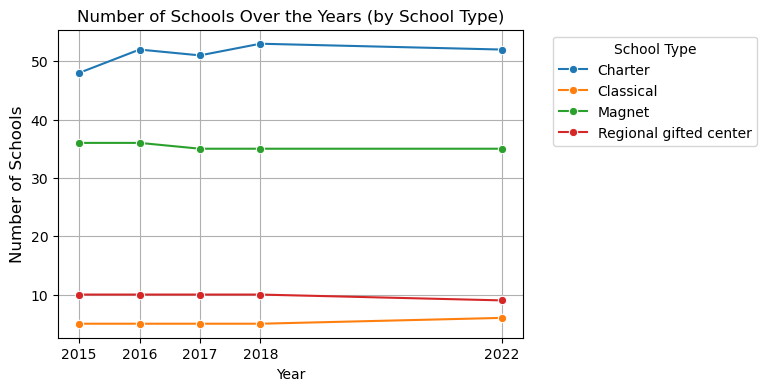

In [10]:
plt.figure(figsize=(6, 4))

sns.lineplot(x='Report_Year', y='school_count', hue='School_Type', data=school_counts, marker='o')

plt.title('Number of Schools Over the Years (by School Type)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Schools', fontsize=12)
plt.xticks([2015, 2016, 2017, 2018, 2022]) 
plt.grid(True)

plt.legend(title='School Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

#### Top 20 Schools Based on Average Attendance Rate
This data suggests that Magnet and Neighborhood elementary schools generally perform well in terms of average attendance, whereas Charter high schools show a noticeable drop in attendance.  

Selective enrollment and military academies show moderate attendance rates, indicating that while these schools are specialized, they do not necessarily outperform others in attendance.

In [15]:
phase2['Average_Attendance'] = (phase2['Student_Attendance_Y1'] + phase2['Student_Attendance_Y2']) / 2
top_20_elementary = phase2[phase2['Elementary/High'] == 'ES'].sort_values(by='Average_Attendance', ascending=False)\
    .head(20)[['School_ID', 'Zip', 'School_Type', 'Elementary/High', 'Average_Attendance']]

top_20_high = phase2[phase2['Elementary/High'] == 'HS'].sort_values(by='Average_Attendance', ascending=False) \
    .head(20)[['School_ID', 'Zip', 'School_Type', 'Elementary/High', 'Average_Attendance']]
print("Top 20 Elementary Schools:")
top_20_elementary.style.background_gradient(axis=0, cmap='Greens', subset=['Average_Attendance'])

Top 20 Elementary Schools:


,School_ID,Zip,School_Type,Elementary/High,Average_Attendance
1087,400167,60609,Charter,ES,98.400000
1636,610217,60616,Neighborhood,ES,98.250000
2285,609959,60616,Neighborhood,ES,98.250000
2255,610217,60616,Neighborhood,ES,98.150000
1704,609959,60616,Neighborhood,ES,98.100000
327,609959,60616,Neighborhood,ES,98.100000
802,609959,60616,Neighborhood,ES,98.050000
729,610217,60616,Neighborhood,ES,98.000000
2074,610242,60613,Neighborhood,ES,97.950000
2253,400069,60624,Charter,ES,97.950000


In [16]:
print("Top 20 High Schools:")
top_20_high.style.background_gradient(axis=0, cmap='Greens', subset=['Average_Attendance'])

Top 20 High Schools:


,School_ID,Zip,School_Type,Elementary/High,Average_Attendance
906,609783,60612,Citywide-Option,HS,97.950000
1793,400022,60622,Contract,HS,97.950000
1703,609783,60612,Citywide-Option,HS,97.750000
2229,400022,60622,Contract,HS,97.450000
2345,609783,60612,Citywide-Option,HS,97.400000
1205,400022,60622,Contract,HS,97.100000
557,400035,60626,Charter,HS,96.750000
1053,400098,60602,Charter,HS,96.600000
1242,400035,60626,Charter,HS,96.550000
421,400149,60632,Charter,HS,96.500000


#### Distribution of the Top 20

To facilitate analysis of geographic distribution, I preprocessed the data to extract ZIP Codes for the top 20 elementary and high schools. The file was then saved as a CSV later used for further analysis.  

Top 20 elementary schools are concentrated in Near South Side and Chinatown, with other schools scattered around the city. This data shows a strong correlation with the area around zip code 60616 and shows high elementary student attendance rate. 

Top 20 high schools however, are predominately concentrated in two zip codes in west neighborhoods, 60612 and 60622, as well as Rogers Park, 60626, in Far North Side.


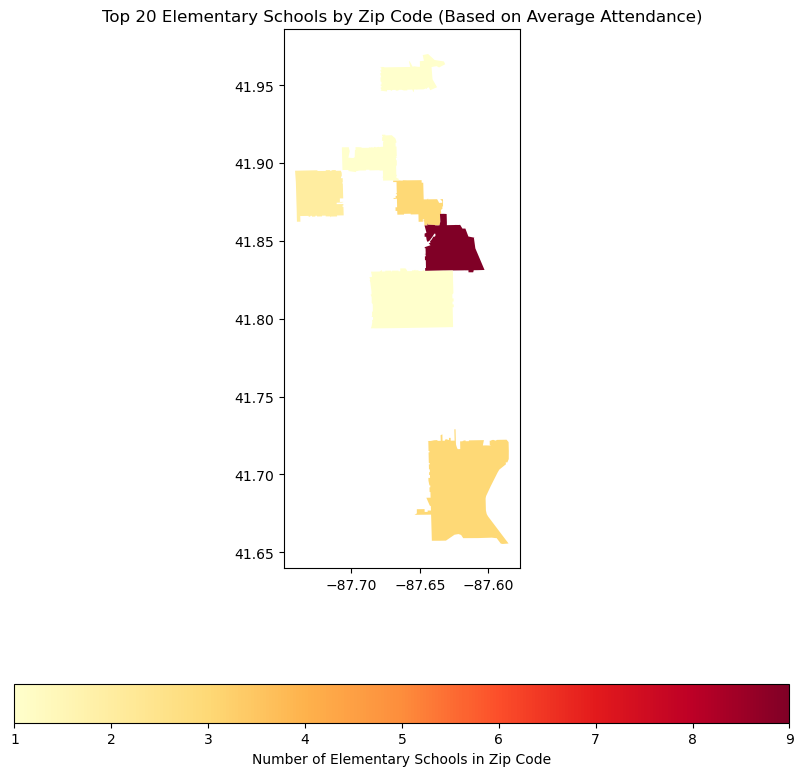

In [25]:
# Read preprocessed file which matches zip codes in map data and my dataframe
top_20_elementary = pd.read_csv('top_20_elementary_zips.csv')
top_20_high = pd.read_csv('top_20_high_zips.csv')

top_20_elementary_zips = top_20_elementary['Zip']
top_20_high_zips = top_20_high['Zip']

#  group the data by Zip code, count how many schools are in each Zip code, 
#and store the results in new DataFrames called top_20_es_zip and top_20_hs_zip
top_20_es_zip = top_20_elementary.groupby('Zip').size().reset_index(name='count')
top_20_hs_zip = top_20_high.groupby('Zip').size().reset_index(name='count')

# Make sure the type of zip codes is string
zip_gdf = gpd.read_file("cb_2020_us_zcta520_500k.shp")
top_20_es_zip['Zip'] = top_20_es_zip['Zip'].astype(str)
top_20_hs_zip['Zip'] = top_20_hs_zip['Zip'].astype(str)
zip_gdf['ZCTA5CE20'] = zip_gdf['ZCTA5CE20'].astype(str)

# Merge school data and map
merged_es = zip_gdf.set_index('ZCTA5CE20').join(top_20_es_zip.set_index('Zip'))
merged_hs = zip_gdf.set_index('ZCTA5CE20').join(top_20_hs_zip.set_index('Zip'))

# Top 20 of elementary school
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(False)
merged_es.plot(column='count', ax=ax, legend=True,
               legend_kwds={'label': "Number of Elementary Schools in Zip Code",
                            'orientation': "horizontal"}, cmap='YlOrRd')
plt.title('Top 20 Elementary Schools by Zip Code (Based on Average Attendance)')
plt.show();

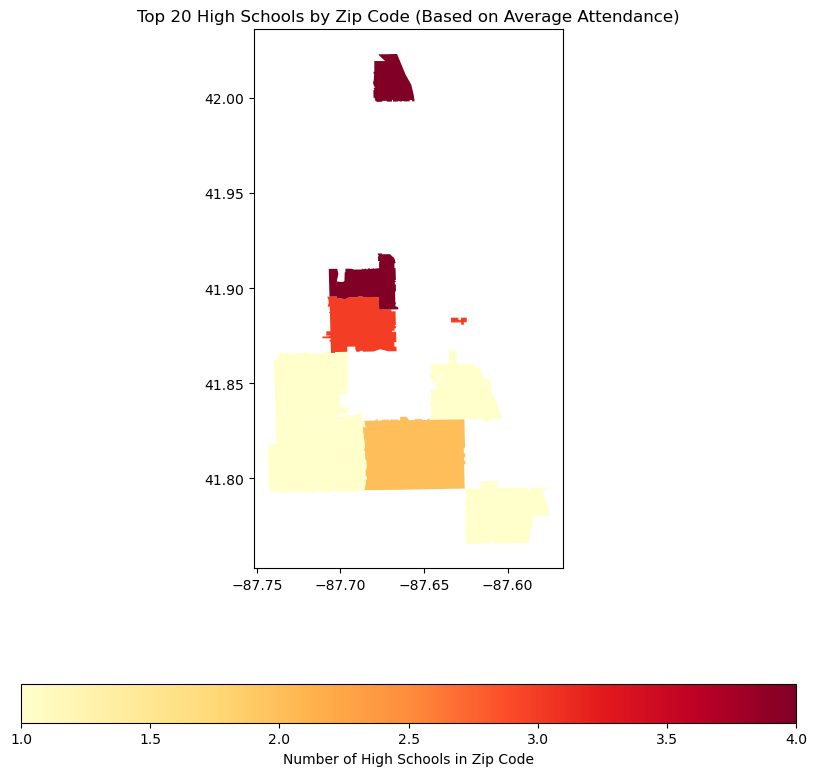

In [26]:
# Top 20 of high school
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(False) 
merged_hs.plot(column='count', ax=ax, legend=True,
               legend_kwds={'label': "Number of High Schools in Zip Code",
                            'orientation': "horizontal"}, cmap='YlOrRd')
plt.title('Top 20 High Schools by Zip Code (Based on Average Attendance)')
plt.show();

#### Correlation
I assumed that there should be a strong correlation between student response rate and average attendance rate because it can be expected that students with high participation in school will be available and willing to complete surveys.

I excluded the value 0 in order to check for a stronger correlation.

In [37]:
phase2_filtered = phase2[(phase2['Student_Response_Rate'] != 0) & (phase2['Average_Attendance'] != 0)]
correlation = phase2_filtered['Student_Response_Rate'].corr(phase2_filtered['Average_Attendance'])
print(f"The Pearson correlation between student response rate and average attendance rate is: {correlation}")

The Pearson correlation between student response rate and average attendance rate is: 0.46120999347162883


While a correlation of 0.4612 indicates some positive relationship between student response rate and attendance, it's not as strong as one might have initially expected. This suggests that while higher response rates tend to coincide with higher attendance rates, other factors are likely at play, affecting the strength of the relationship.

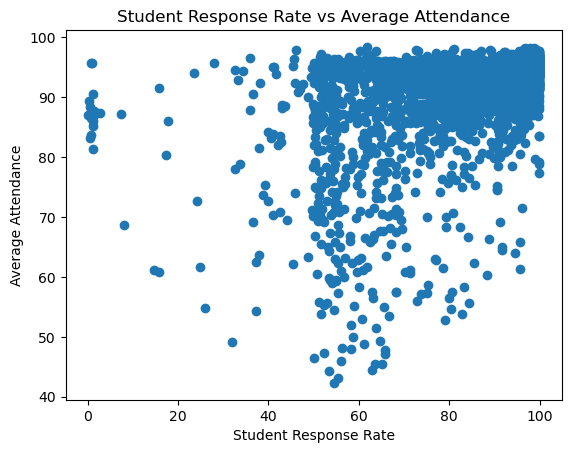

In [39]:
plt.scatter(phase2_filtered['Student_Response_Rate'], phase2_filtered['Average_Attendance'])
plt.title('Student Response Rate vs Average Attendance')
plt.xlabel('Student Response Rate')
plt.ylabel('Average Attendance')
plt.show();

#### Correlation - Average Attendance Rate and Survey Scoring Criteria
The strongest correlation is between attendance and Involved_Families_Score with a correlation of 0.36, which indicates a moderately positive relationship.
Supportive_Environment_Score shows no meaningful correlation with attendance, suggesting that a supportive environment does not directly impact attendance in this case.
The remaining scores (e.g., Ambitious Instruction, Effective Leaders, Collaborative Teachers, and Safety) all show weak positive correlation, meaning that while there may be some relationship, the effect is not strong enough to make definitive conclusions based solely on these results.

                              Correlation
Involved_Families_Score          0.362624
Supportive_Environment_Score    -0.000508
Ambitious_Instruction_Score      0.184788
Effective_Leaders_Score          0.140260
Collaborative_Teachers_Score     0.147120
Safety_Score                     0.218040


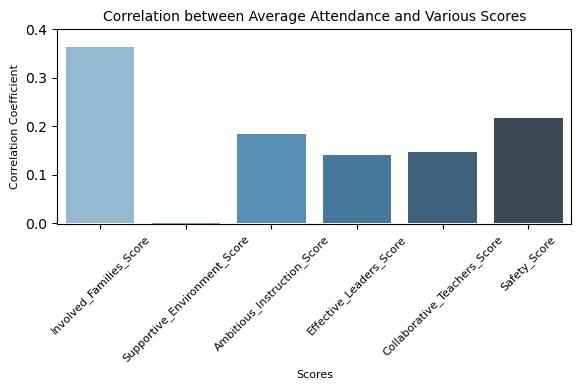

In [22]:
scores = ['Involved_Families_Score','Supportive_Environment_Score','Ambitious_Instruction_Score',
          'Effective_Leaders_Score', 'Collaborative_Teachers_Score','Safety_Score']
correlations = {score: phase2['Average_Attendance'].corr(phase2[score]) for score in scores}
correlation_df = pd.DataFrame(correlations, index=['Correlation']).T
print(correlation_df)
plt.figure(figsize=(6, 4))
sns.barplot(x=correlation_df.index, y=correlation_df['Correlation'], palette='Blues_d')
plt.title('Correlation between Average Attendance and Various Scores', fontsize=10)
plt.xlabel('Scores', fontsize=8)
plt.ylabel('Correlation Coefficient', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.ylim(-0.001, 0.4)  
plt.tight_layout()
plt.show();

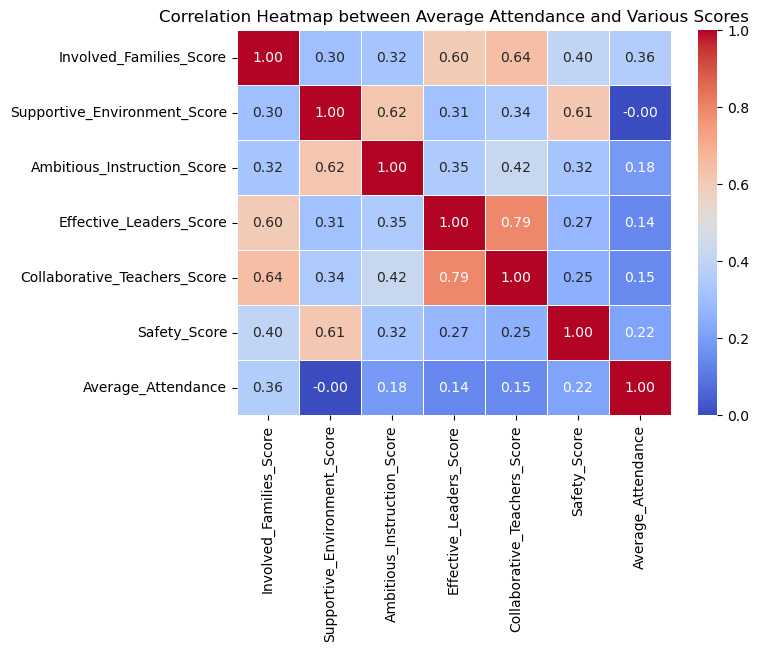

In [43]:
correlation_matrix = phase2[scores + ['Average_Attendance']].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Average Attendance and Various Scores')
plt.show();

#### Correlation -  Student Response Rate and Overall Score
It is surprising that student response rate and overall survey score are not more strongly correlated at 0.19. There could be several reasons for this. First, the calculation of the average where "Not enough data" is represented by 2.5 instead of zero, for example, maybe inadvertently concealing the presence of many such missing entries in the data that would otherwise make the score dip with decreases in attendance rate. Second, the comparison of a score out of five with an attendance rate out of 100 may not be an apt comparison, misinterpreting a score out of five as a score out of a hundred. Third, the lack of significant correlation may be legitimate. It's conceivable that schools with lower attendance rates suffer from truancy or other outside factors not indicative of a school's quality of instruction. Conversely, it's also possible schools with high attendance rates have committed students who participate in school despite lackluster survey scores.

In [9]:
phase2['Student_Response_Rate'] = pd.to_numeric(phase2['Student_Response_Rate'], errors='coerce')
phase2['Overall_Score'] = pd.to_numeric(phase2['Overall_Score'], errors='coerce')
correlation = phase2['Student_Response_Rate'].corr(phase2['Overall_Score'])
print(f"The Pearson correlation between Student Response Rate and Overall Score is: {correlation}")

The Pearson correlation between Student Response Rate and Overall Score is: 0.19366549661918467


#### Top 20 Schools Based on Overall Score
- Schools in the dataset mostly have perfect performance scores at 5.00, with only a few schools having slightly lower scores at 4.83.
- Neighborhood schools make up the bulk of the dataset, and most of these schools have the highest Overall_Score of 5.00.
- There is a mix of school types, Magnet, Charter, and Regional Gifted Center schools, each having some diversity in their scores, though performing well overall.
- Elementary Schools (ES) generally perform at a high level as well, as they constitute most of the schools scoring 5.00. High Schools (HS) have fewer perfect scores but still perform well.

In [11]:
top_schools = phase2[['School_ID', 'School_Type', 'Overall_Score', 'Elementary/High']].sort_values(by='Overall_Score', ascending=False).head(20)
print(top_schools)

      School_ID             School_Type  Overall_Score Elementary/High
1657     609919            Neighborhood       5.000000              ES
2153     610082            Neighborhood       5.000000              ES
1877     610021            Neighborhood       5.000000              ES
1266     610084  Regional gifted center       5.000000              ES
1397     400114                 Charter       5.000000              ES
1127     609853            Neighborhood       5.000000              ES
1297     610073            Neighborhood       5.000000              ES
911      609849            Neighborhood       5.000000              ES
1849     609872            Neighborhood       5.000000              ES
2004     610084  Regional gifted center       5.000000              ES
999      610402                  Magnet       5.000000              HS
970      400134                 Charter       5.000000              HS
606      609849            Neighborhood       5.000000              ES
1339  

#### Overall Score Distribution by ZIP Code in 2015, 2016, 2017, 2018, 2022
In an effort to expand survey result analysis to include all Chicago public schools in the dataset as well as visualize the data on a map of Chicago, I color coded a zip code map based on best performing schools. Each map includes a mix of elementary and high school data because I want to pick the best location to buy a house and have a family in the city. My assumptions are that schools in more developed communities such as those on North Side, Loop, and South Loop will be better performing, where as communities with less development such as those in the West Neighborhoods and South Side will be lower performing.

Across each of the five maps, similar patterns emerge. Schools in North Side tend to have better scores but contain pockets of lower scoring zip codes. In the west and south neighborhoods of the city schools are lower performing in general, however isolated regions of higher performance exist, such as Hyde Park (60615) in South Side as can be seen in the 2017 map, or even more consistently, Mount Greenwood (60655) in Far Southwest Side which can be seen in the 2015, 2016, and 2018 map.
If we take 2022 data to be the most relevant to my house search, neighborhoods such as West Town (60622) in West Side appear to be highest performing while Montclare (60707) and Belmont Cragin (60639) in Northwest Side as well as Jefferson Park and surrounding communities (60630) in Far North Side are moderately high performing. This is surprising as I assumed West Side would be a area to avoid, I'm now cautiously optimistic to begin my search there.

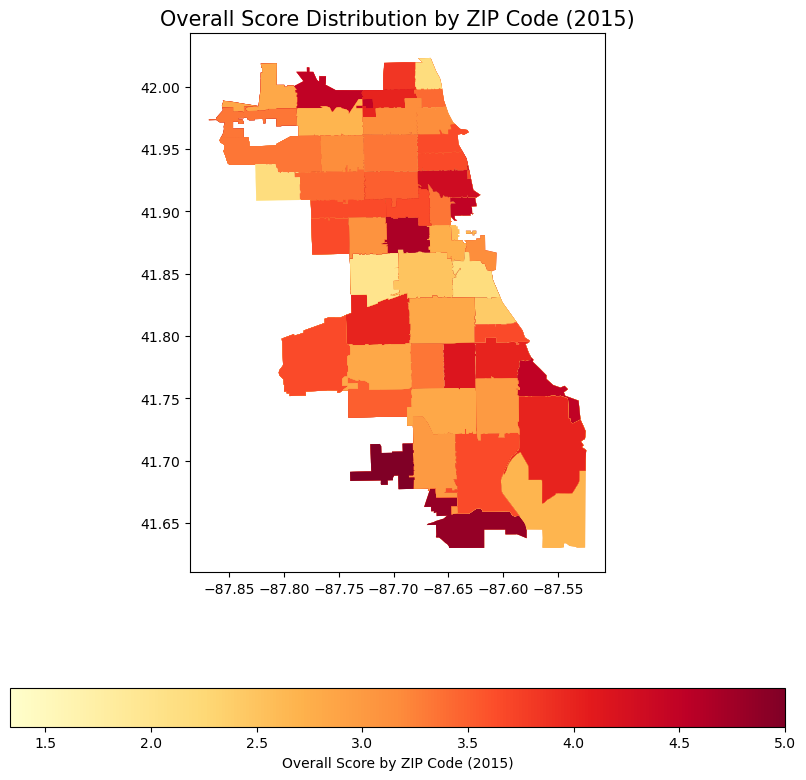

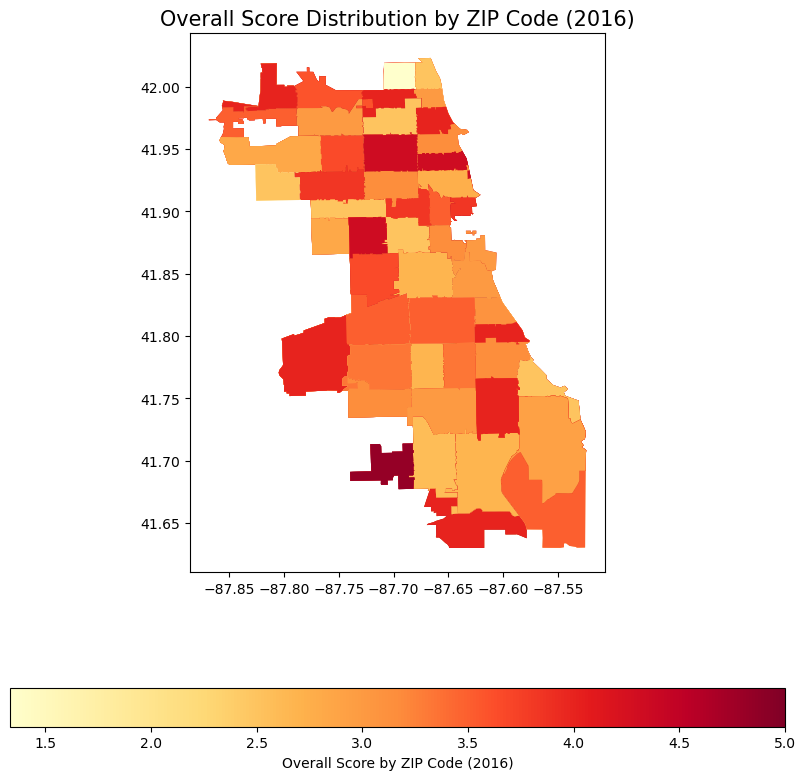

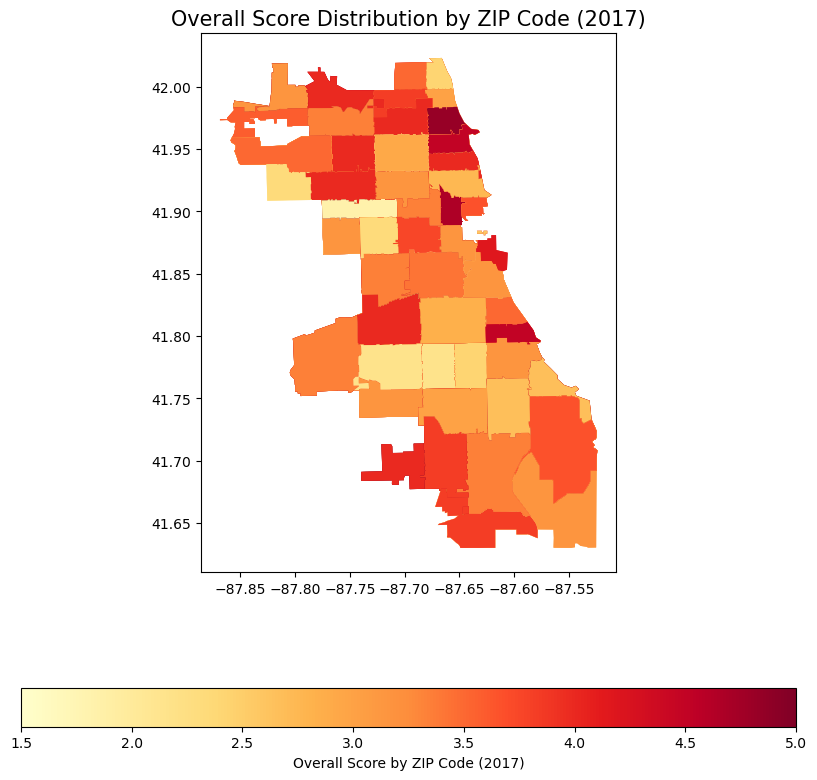

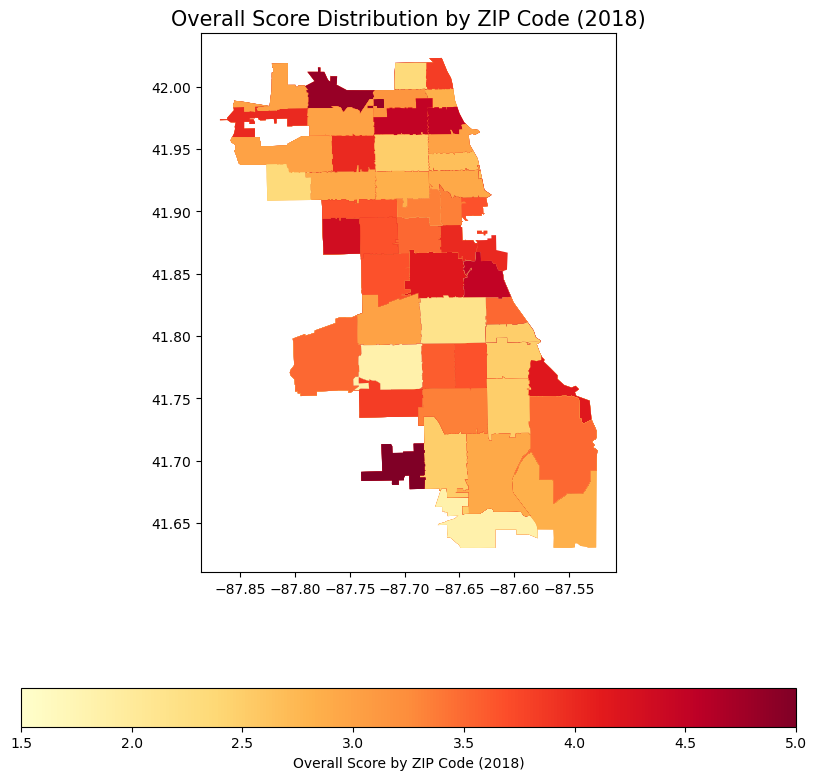

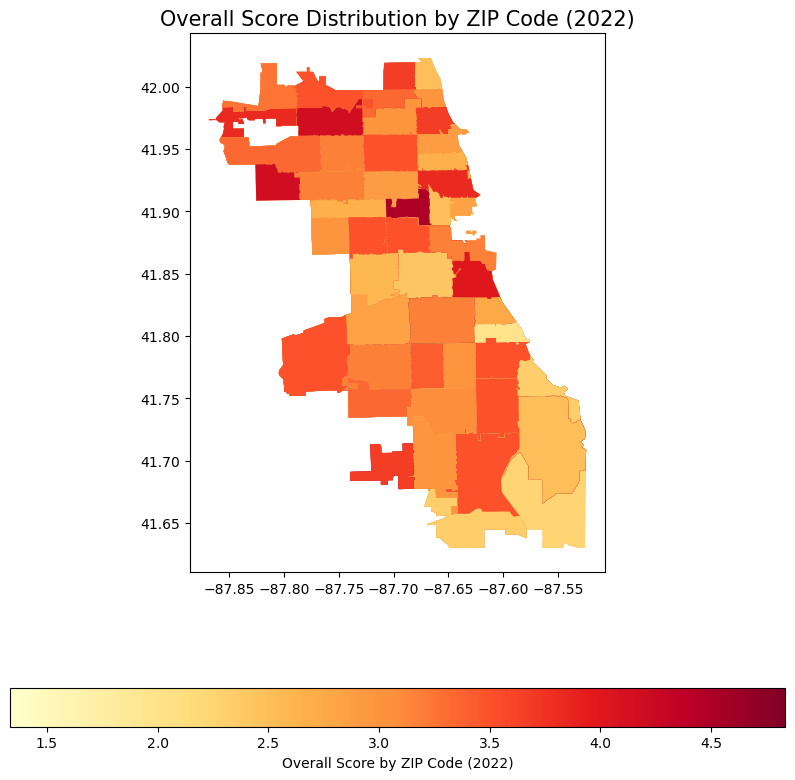

In [30]:
zip_codes = pd.read_csv('filtered_data2.csv')
zip_code_counts = zip_codes['Zip'].value_counts().reset_index()
zip_code_counts.columns = ['Zip', 'count']
zip_gdf = gpd.read_file("cb_2020_us_zcta520_500k.shp")
zip_gdf['ZCTA5CE20'] = zip_gdf['ZCTA5CE20'].astype(str)

years = [2015, 2016, 2017, 2018, 2022]
for year in years:
    zip_codes_year = zip_codes[zip_codes['Report_Year'] == year]
    zip_codes_year['Zip'] = zip_codes_year['Zip'].astype(str)
    merged_data = zip_gdf.merge(zip_codes_year[['Zip', 'Overall_Score', 'Report_Year']], 
                                left_on='ZCTA5CE20', right_on='Zip', how='left')
    merged_data.to_csv(f"merged_{year}.csv", index=False)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    _=merged_data.plot(column='Overall_Score', ax=ax, legend=True, 
                     legend_kwds={'label': f"Overall Score by ZIP Code ({year})", 'orientation': "horizontal"},
                     cmap='YlOrRd');
    _=ax.set_title(f"Overall Score Distribution by ZIP Code ({year})", fontsize=15);
    plt.show();
   

## Summary


This project investigates the performance of Chicago public schools through a comparative analysis using key metrics such as student attendance rates and survey results. The aim is to assist parents, including myself as a future parent, in evaluating school performance across Chicago's neighborhoods. By analyzing the correlation between attendance rates and survey scores, as well as visualizing these data points geographically, the study offers insights into the relationship between school type, location, and overall performance.

Key hypotheses were developed to explore differences by school type, region, and specific scoring criteria. The analysis also focused on trends over time and potential impacts of school environment on student attendance. Special attention was given to selective and high-performing schools, such as Magnet and Regional Gifted Centers, to evaluate their consistency and longevity.

**Challenges Encountered**

Several challenges arose during the project:
1. Data Completeness: Some schools lacked sufficient survey data, requiring the use of a placeholder value (2.5) for "Not Enough Data." This approach might have affected the accuracy of the average scores. Furthermore, data from 2019, 2020, and 2021 was insufficient to analyze as part of this project, resulting a gap which obscures the most recent change over time.

2. Correlation Limitations: Despite expectations, the correlation between survey response rates and overall scores was weak, leading to additional investigation into potential misinterpretations or data inconsistencies.

3. Geographic Analysis: Mapping school performance by ZIP code was insightful but required careful preprocessing and visualization to ensure accuracy and clarity, especially for densely populated neighborhoods like the Loop.

4. Scoring Comparisons: Comparing survey scores on a 1 to 5 scale with attendance rates (percentage scale) presented challenges in ensuring the metrics were appropriately interpreted.

**Conclusions** 

1. Correlation Insights: A moderately positive correlation exists between attendance rate and certain scoring criteria, particularly the Involved Families criterion. However, other metrics, such as Supportive Environment, showed little to no correlation.

2. Regional Trends: Schools in more developed areas (e.g., North Side and Loop) generally performed better in the survey, though pockets of underperformance were revealed in the data. Conversely, the assumed to be underperforming areas (e.g., West Side and South Side) contained pockets of high-scoring schools, challenging initial assumptions.

3. School Type: Magnet, Charter, and Regional Gifted Centers consistently ranked among the top-performing schools, though differences emerged between elementary and high school. Neighborhood schools also displayed strong overall scores than expected, highlighting their importance in the public school system.

4. Practical Implications: The findings suggest that families seeking high-quality education should consider schools in specific neighborhoods, balancing student experience with personal and logistical preferences.

**Next Steps** 

1. Expand Data Scope: Include additional years or integrate data from other cities for comparative analysis. Alternatively, gather survey data from parents and teachers to better understand the student experience from differing perspectives.

2. Deeper Correlation Analysis: Investigate other potential factors (e.g., socioeconomic status, funding, and extracurricular programs) that may influence performance metrics.

3. Advanced Visualizations: Develop interactive maps or dashboards to allow users to explore school performance by neighborhood and year.

4. Policy Recommendations: Use insights to suggest targeted interventions for underperforming schools or regions, decreasing education disparity across Chicago.